# Analysis on US Home Prices

Prices of Houses is dependant on various factors like Demographics, Interest rates, Economic conditions, Inflation rates, Government policies, etc... But in this analysis, we're going to consider 3 factors that affects a man with average income trying to enter the Real Estate market.

<img title="US Houses" alt="US Houses" src="https://media.istockphoto.com/id/1164254755/photo/row-of-small-american-clapboard-houses.jpg?s=612x612&w=0&k=20&c=Qv-Z1QhDpm-skWeeqxHbUhNeORykvpIJoPty9Rmx5uo=">

### Key Factors:

- Unemployment
- Disposable Income
- Interest rates

### Unemployment
High unemployment reduces demand, leading to slower price growth or declining home values. Low unemployment boosts demand, driving prices up.

### Disposable Income
Disposable income impacts home prices by influencing demand. When people have more disposable income, they're more likely to buy or upgrade homes, driving up demand and, subsequently, prices. It's a key factor in housing markets, as it affects buyers' purchasing power and willingness to spend.

### Interest Rates
Interest rates impact home prices by affecting borrowing costs. Low interest rates make borrowing cheaper, increasing demand and driving prices up. High interest rates make borrowing more expensive, reducing demand and slowing price growth or even leading to declines.

In [31]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Home Price Dataset

price_index = pd.read_csv("D:\ASP\Home.LLC Model\Home_Price_Index.csv")
price_index["Year"] = pd.to_datetime(price_index["Year"], format="%Y")
price_index.head(10)

,Observation_Date,Year,Sales
0,01-01-2005,2005-01-01,161.289
1,01-02-2005,2005-01-01,163.346
2,01-03-2005,2005-01-01,165.814
3,01-04-2005,2005-01-01,167.503
4,01-05-2005,2005-01-01,169.352
5,01-06-2005,2005-01-01,171.192
6,01-07-2005,2005-01-01,172.861
7,01-08-2005,2005-01-01,174.443
8,01-09-2005,2005-01-01,176.439
9,01-10-2005,2005-01-01,178.028


In [20]:
def index_plot(ax):
    plt.figure(figsize = (8,4))
    sns.lineplot(data=price_index, x="Year", y="Sales", color="blue", ax=ax)
    ax.set_ylabel("Houses Sales")
    ax.set_title("Home Price Index")
    ax.grid(True)
    return


In [21]:
# Factor 1 - Disposable Income

income=pd.read_csv("Disposable_Income.csv")
income["Year"] = pd.to_datetime(income["Year"], format="%Y")
income.head(10)

,Observation_Date,Year,Income
0,01-01-2005,2005-01-01,9082.2
1,01-02-2005,2005-01-01,9109.5
2,01-03-2005,2005-01-01,9169.2
3,01-04-2005,2005-01-01,9223.7
4,01-05-2005,2005-01-01,9268.6
5,01-06-2005,2005-01-01,9293.1
6,01-07-2005,2005-01-01,9342.1
7,01-08-2005,2005-01-01,9394.8
8,01-09-2005,2005-01-01,9452.2
9,01-10-2005,2005-01-01,9520.0


In [22]:
def income_plot(ax):
    plt.figure(figsize = (8,4))
    ax = sns.lineplot(data=income, x="Year", y="Income", color="purple", ax=ax)
    ax.set_ylabel("Income")
    ax.set_title("Disposable Income")
    ax.grid(True)
    return


In [23]:
# Factor 2 - Mortgage rates

interest_rate = pd.read_csv("Mortgage_Rates.csv")
interest_rate["Year"] = pd.to_datetime(interest_rate["Year"], format="%Y")
interest_rate.head(10)

,observation_date,Year,Interest Rates
0,01-01-2005,2005-01-01,5.71
1,01-02-2005,2005-01-01,5.63
2,01-03-2005,2005-01-01,5.93
3,01-04-2005,2005-01-01,5.86
4,01-05-2005,2005-01-01,5.72
5,01-06-2005,2005-01-01,5.58
6,01-07-2005,2005-01-01,5.70
7,01-08-2005,2005-01-01,5.82
8,01-09-2005,2005-01-01,5.77
9,01-10-2005,2005-01-01,6.07


In [24]:
def interest_plot(ax):
    plt.figure(figsize = (8,4))
    ax = sns.lineplot(data=interest_rate, x="Year", y="Interest Rates", color="orange", ax=ax)
    ax.set_ylabel("Interest Rates")
    ax.set_title("Debt Mortgage Rates")
    ax.grid(True)
    return


In [25]:
# Factor 3 - Unemployment Rates

unemployment_rate = pd.read_csv("Unemployment_Rate.csv")
unemployment_rate["Year"] = pd.to_datetime(unemployment_rate["Year"], format="%Y")
unemployment_rate.head(10)

,Observation_Date,Year,Unemployment_Rate
0,01-01-2005,2005-01-01,4.7
1,01-02-2005,2005-01-01,4.8
2,01-03-2005,2005-01-01,4.6
3,01-04-2005,2005-01-01,4.5
4,01-05-2005,2005-01-01,4.5
5,01-06-2005,2005-01-01,4.5
6,01-07-2005,2005-01-01,4.4
7,01-08-2005,2005-01-01,4.3
8,01-09-2005,2005-01-01,4.5
9,01-10-2005,2005-01-01,4.4


In [26]:
def unemployment_plot(ax):
    plt.figure(figsize = (8,4))
    ax = sns.lineplot(data=unemployment_rate, x="Year", y="Unemployment_Rate", color="red", ax=ax)
    ax.set_ylabel("Unemployment")
    ax.set_title("Unemployment Rate")
    ax.grid(True)
    return


In [38]:
# Merge the DataFrames into a single DataFrame for the model
df = pd.merge(price_index, income, on='Year', how='inner')
df = pd.merge(df, interest_rate, on='Year', how='inner')
df = pd.merge(df, unemployment_rate, on='Year', how='inner')

# Ensure the value column names are as expected
df.rename(columns={'Sales': 'Price_Index',
                   'Income': 'Income',
                   'Interest Rates': 'Interest_Rate',
                   'Unemployment_Rate': 'Unemployment_Rate'}, inplace=True)

# Prepare the data for the linear regression model
X = df[['Income', 'Interest_Rate', 'Unemployment_Rate']] # Independent variables
y = df['Price_Index']  

In [39]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("\nModel Coefficients:")
print(f"Coefficient for Income: {model.coef_[0]:.4f}")
print(f"Coefficient for Interest Rate: {model.coef_[1]:.4f}")
print(f"Coefficient for Unemployment Rate: {model.coef_[2]:.4f}")
print(f"Intercept: {model.intercept_:.2f}")

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 225.04
R-squared (R2): 0.93

Model Coefficients:
Coefficient for Income: 0.0132
Coefficient for Interest Rate: 12.5081
Coefficient for Unemployment Rate: -3.6861
Intercept: -28.52


In [50]:
# Explain the impact of x on y using the model
print("Explanation of the Impact of Independent Variables on Price Index:")
print("- A one-unit increase in Income is associated with a change of {:.4f} in the Price Index, holding other factors constant.".format(model.coef_[0]))
print("- A one-unit increase in Interest Rate is associated with a change of {:.4f} in the Price Index, holding other factors constant.".format(model.coef_[1]))
print("- A one-unit increase in Unemployment Rate is associated with a change of {:.4f} in the Price Index, holding other factors constant.".format(model.coef_[2]))

Explanation of the Impact of Independent Variables on Price Index:
- A one-unit increase in Income is associated with a change of 0.0132 in the Price Index, holding other factors constant.
- A one-unit increase in Interest Rate is associated with a change of 12.5081 in the Price Index, holding other factors constant.
- A one-unit increase in Unemployment Rate is associated with a change of -3.6861 in the Price Index, holding other factors constant.


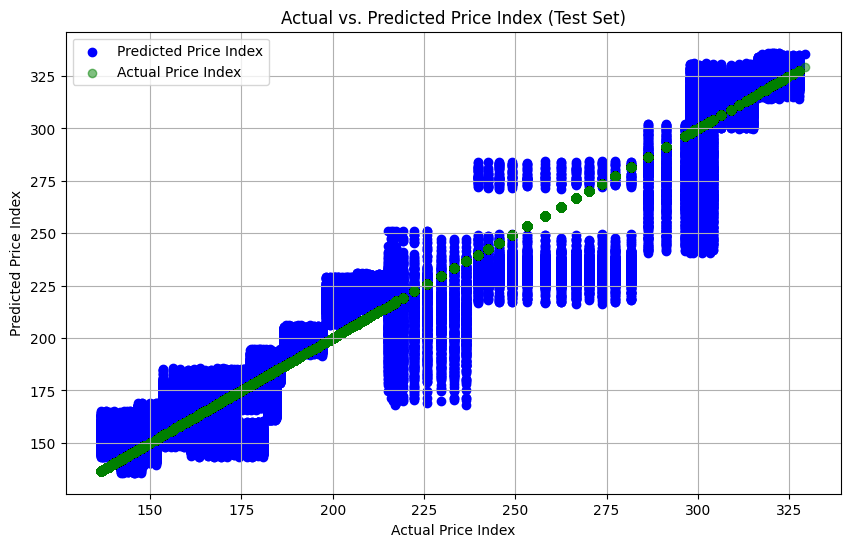

c:\Users\asp99\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asp99\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asp99\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asp99\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

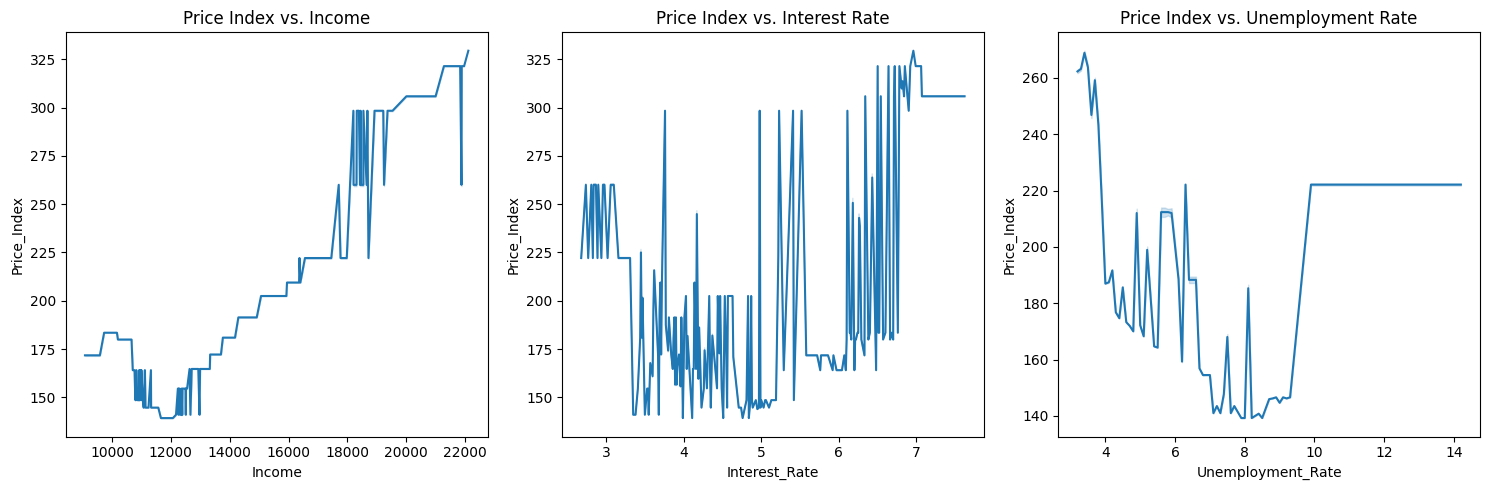

In [ ]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Price Index')
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual Price Index')
plt.xlabel("Actual Price Index")
plt.ylabel("Predicted Price Index")
plt.title("Actual vs. Predicted Price Index (Test Set)")
plt.legend()
plt.grid(True)
plt.show()

# Visualize the relationship of each independent variable with Price Index (simple line plots)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.lineplot(x='Income', y='Price_Index', data=df)
plt.title("Price Index vs. Income")

plt.subplot(1, 3, 2)
sns.lineplot(x='Interest_Rate', y='Price_Index', data=df)
plt.title("Price Index vs. Interest Rate")

plt.subplot(1, 3, 3)
sns.lineplot(x='Unemployment_Rate', y='Price_Index', data=df)
plt.title("Price Index vs. Unemployment Rate")

plt.tight_layout()
plt.show()

c:\Users\asp99\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asp99\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asp99\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asp99\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

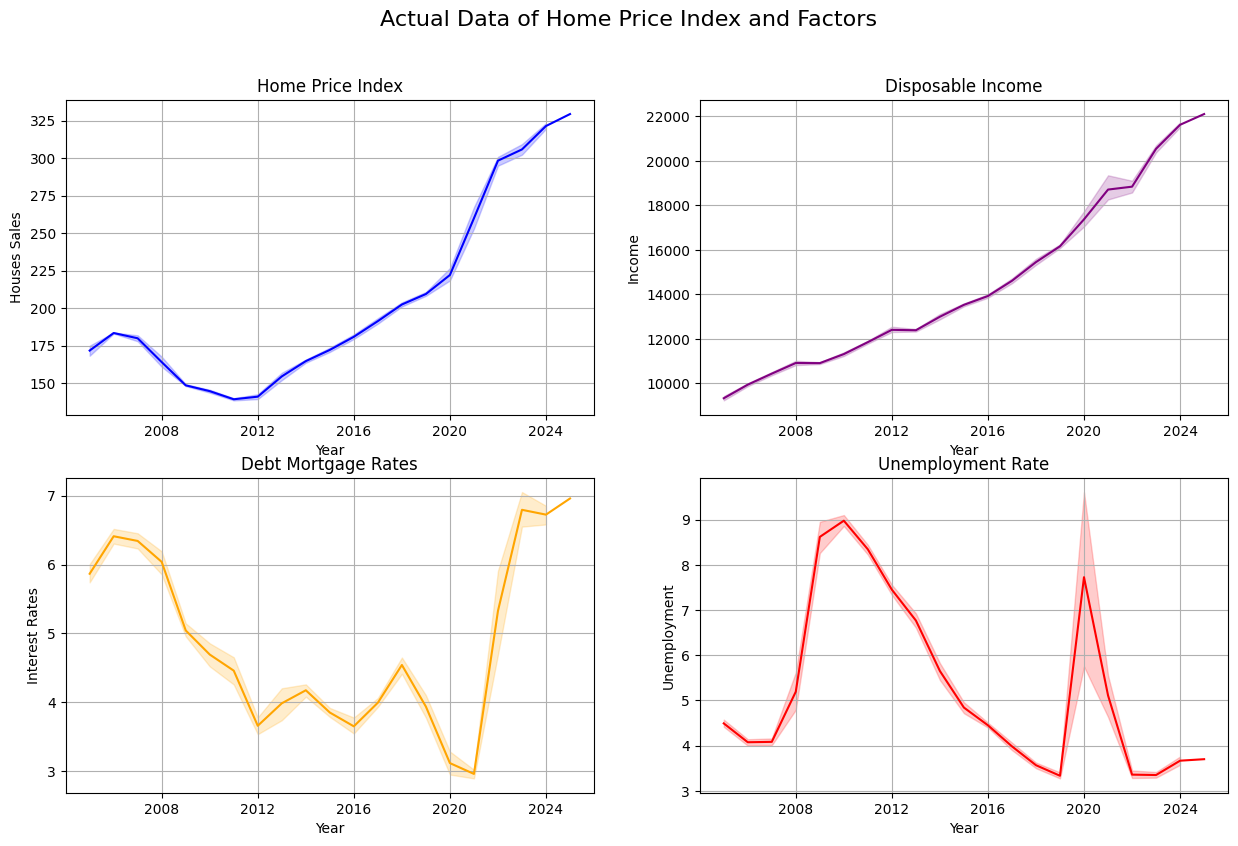

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9))
fig.suptitle("Actual Data of Home Price Index and Factors", fontsize=16)
index_plot(axes[0,0])
income_plot(axes[0,1])
interest_plot(axes[1,0])
unemployment_plot(axes[1,1])

plt.tight_layout(pad=3.0)
plt.show()

## Conclusion - Diagnosis

For this analysis, I've taken the data for the last 20 years (2005 - 2025) as mentioned. All the data used here are taken from FRED Economic Data Sources. There are many factors for the prices of Houses to change, but I've taken 3 main factors for this consideration. They are Disposable Income, Interest Rates and Unemployment Rates.

These are the steps involved in the analysis,
- Prepared the data for analysis.
- Built visualizations for Actual data.
- Built a Linear Regression Model as they're more apt for this condition.
- Splitted the training and test data.
- Training the model for the data.
- Making predictions and evaluating the model.
- Plotting the predicted data.
- Analyzing the impact of factors in the Housing Price Index.


Impact of factors in the Housing Price Index:
- A one-unit increase in Income is associated with a change of 0.0132 in the Price Index, holding other factors constant.
- A one-unit increase in Interest Rate is associated with a change of 12.5081 in the Price Index, holding other factors constant.
- A one-unit increase in Unemployment Rate is associated with a change of -3.6861 in the Price Index, holding other factors constant.

So based on this we can understand that Interest Rates has the highest impact in the Housing Sales, leaving Unemployment Rate second and Disposable income third. The comparison charts signifies how sensitive is the change in Interest rate to the Housing Price Index. 

I honestly have to say this that after looking about Home.LLC, I genuinely thought what you guys are doing a smart idea. Because it is a kind of innovative idea of partial ownership with splitting capital appreciation. That's really a great idea. If it ever comes to India, I think I might be one of our customers. 